In [24]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [25]:
def comp_area(ton,gray):
    element = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
    gray[gray!=0] = 1
    con =len(np.flatnonzero(ton))
    mask = cv.dilate(gray,element)
    contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    len_contour = len(contours)
    contour_list = []
    for i in range(len_contour):
        drawing = np.zeros_like(mask, np.uint8)  # create a black image
        img_contour = cv.drawContours(drawing, contours, i, (255, 255, 255), -1)
        contour_list.append(img_contour)
 
    out = sum(contour_list)
    area_con = len(np.flatnonzero(out))/con
    return area_con

In [32]:
def seg(img_root):
    mask = cv.imread(img_root, 0)
    img = cv.imread(img_root)
    mask1 = mask.reshape((-1, 1))
    mask1[mask1 != 0] = 1
    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    a = lab[:, :, 1].astype(np.float32)

    a = a.reshape((-1, 1))
    z = a * mask1
    idx = np.flatnonzero(z)
    a = pd.DataFrame(z).replace(0, np.NAN)
    a.dropna(inplace=True)
    a = np.float32(a)
    criteria = (cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    ret, label, center = cv.kmeans(a, k, None, criteria, 10, cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    # label = label.reshape((mask.shape))

    cmax = np.min(center)
    res = center[label.flatten()]
    res2 = np.zeros_like(mask1)
    res2[idx] = res
    res2[res2 != cmax] = 0
    res2[res2 == cmax] = 1
    res2 = res2.reshape((mask.shape))
    rat = comp_area(mask, res2)
    coat = cv.merge([res2, res2, res2])
    sub = 1 - coat

    coats = img * coat
    subs = img * sub
    return subs

In [33]:
a = seg(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data2all\category\0\20220510111238-1.png')

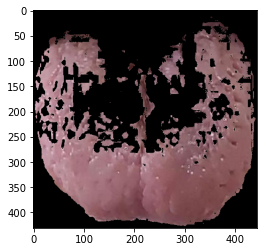

In [34]:
plt.imshow(a[:,:,::-1])

In [68]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category'
for filelst in tqdm(os.listdir(root)):
    for img in tqdm(os.listdir(os.path.join(root, filelst))):
        new_name = img[:-4] + 'seg' +'.png'
        seg_img = seg(os.path.join(root, filelst, img))
        cv.imwrite(os.path.join(root, filelst, new_name), seg_img)

 24%|██████████████████▋                                                            | 356/1502 [00:20<01:28, 12.99it/s]


 47%|█████████████████████████████████████▏                                         | 706/1502 [00:40<01:11, 11.20it/s]


 61%|████████████████████████████████████████████████▎                              | 919/1502 [02:02<00:49, 11.71it/s]


 74%|█████████████████████████████████████████████████████████▊                    | 1114/1502 [05:45<08:43,  1.35s/it]


 83%|████████████████████████████████████████████████████████████████▊             | 1248/1502 [09:37<01:33,  2.73it/s]


 93%|████████████████████████████████████████████████████████████████████████▏     | 1390/1502 [13:31<01:58,  1.06s/it]


 31%|█████████████████████████▏                                                       | 63/203 [00:04<00:09, 15.21it/s]


 67%|███████████████████████████████████████████████████████▏                          | 33/49 [00:04<00:02,  6.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [20:09<00:00, 241.80s/it]


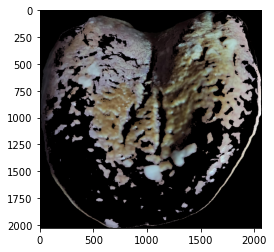

In [55]:
plt.imshow(a[:,:,::-1])

# 删除图片

In [70]:
root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category'
for filelst in os.listdir(root):
    for img in tqdm(os.listdir(os.path.join(root, filelst))):
        if img[-10:] == 'segseg.png':
            os.remove(os.path.join(root, filelst, img))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]
